<a href="https://colab.research.google.com/github/manishyerram89/ImgToText/blob/main/ImgToText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
annot = pd.read_parquet('/content/drive/MyDrive/ImgToTxt/annot.parquet')
imgs = pd.read_parquet('/content/drive/MyDrive/ImgToTxt/img.parquet')
img_fns = glob('/content/drive/MyDrive/ImgToTxt/train_images/*')

In [8]:
annot.head()

id          image_id                           bbox  \
0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   [525.83, 3.4, 197.64, 33.94]   
1  a4ea732cd3d5948a_2  a4ea732cd3d5948a  [534.67, 64.68, 91.22, 38.19]   
2  a4ea732cd3d5948a_3  a4ea732cd3d5948a  [626.95, 63.62, 96.52, 31.82]   
3  a4ea732cd3d5948a_4  a4ea732cd3d5948a  [577.4, 141.87, 147.13, 43.1]   
4  a4ea732cd3d5948a_5  a4ea732cd3d5948a  [391.03, 163.9, 60.82, 38.65]   

   utf8_string                                             points     area  
0  Performance  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1        Sport  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2        Watch  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3   ...period.  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4            .  [395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...  2350.69

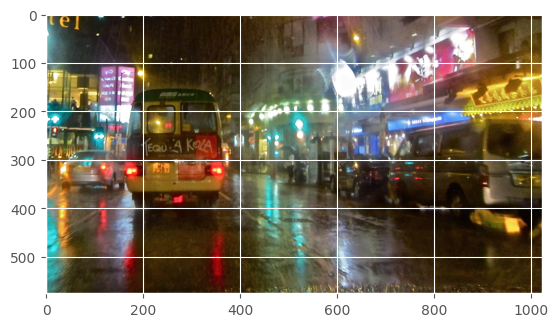

In [14]:
plt.imshow(plt.imread(img_fns[0]))

In [16]:
image_id = img_fns[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

id          image_id                            bbox  \
684409   00010bf498b64bab_1  00010bf498b64bab  [189.71, 252.79, 70.38, 46.75]   
684410   00010bf498b64bab_2  00010bf498b64bab  [254.95, 254.85, 31.34, 35.96]   
684411   00010bf498b64bab_3  00010bf498b64bab  [285.27, 254.85, 65.25, 36.47]   
684412   00010bf498b64bab_4  00010bf498b64bab  [242.62, 224.02, 19.01, 15.93]   
684413   00010bf498b64bab_5  00010bf498b64bab  [227.02, 307.18, 21.69, 13.56]   
684414   00010bf498b64bab_6  00010bf498b64bab   [219.23, 317.35, 36.6, 13.89]   
684415   00010bf498b64bab_7  00010bf498b64bab  [227.02, 286.84, 80.67, 13.22]   
684416   00010bf498b64bab_8  00010bf498b64bab  [231.77, 159.05, 42.03, 14.58]   
684417   00010bf498b64bab_9  00010bf498b64bab  [271.09, 159.39, 37.96, 14.58]   
684418  00010bf498b64bab_10  00010bf498b64bab   [58.14, 314.23, 33.65, 11.82]   
684419  00010bf498b64bab_11  00010bf498b64bab  [118.71, 115.14, 23.39, 13.22]   
684420  00010bf498b64bab_12  00010bf498b64bab  [111.59, 128.36, 34.24, 13.56]   
684421  00010bf498b64bab_13  00010bf498b64bab   [111.93, 141.24, 29.49, 13.9]   
684422  00010bf498b64bab_14  00010bf498b64bab   [108.2, 157.51, 38.64, 12.54]   
684423  00010bf498b64bab_15  00010bf498b64bab  [116.34, 172.09, 21.01, 10.84]   
684424  00010bf498b64bab_16  00010bf498b64bab  [154.11, 114.12, 22.14, 16.33]   
684425  00010bf498b64bab_17  00010bf498b64bab  [146.96, 125.97, 34.88, 16.78]   
684426  00010bf498b64bab_18  00010bf498b64bab  [150.76, 142.52, 27.95, 13.64]   
684427  00010bf498b64bab_19  00010bf498b64bab  [145.62, 157.28, 35.55, 14.99]   
684428  00010bf498b64bab_20  00010bf498b64bab  [153.22, 171.15, 19.68, 12.74]   
684429  00010bf498b64bab_21  00010bf498b64bab     [1.68, -0.14, 72.88, 37.97]   
684430  00010bf498b64bab_22  00010bf498b64bab  [125.42, 226.83, 33.93, 16.23]   
684431  00010bf498b64bab_23  00010bf498b64bab  [885.63, 136.5, 129.83, 56.06]   
684432  00010bf498b64bab_24  00010bf498b64bab  [774.94, 210.48, 43.93, 16.18]   
684433  00010bf498b64bab_25  00010bf498b64bab  [752.59, 217.67, 24.92, 12.07]   
684434  00010bf498b64bab_26  00010bf498b64bab  [665.41, 165.07, 30.69, 28.04]   
684435  00010bf498b64bab_27  00010bf498b64bab  [982.45, 362.02, 40.07, 16.95]   
684436  00010bf498b64bab_28  00010bf498b64bab  [631.27, 235.19, 23.05, 11.86]   
684437  00010bf498b64bab_29  00010bf498b64bab    [615.51, 240.1, 11.52, 9.49]   

       utf8_string                                             points     area  
684409        TEQU  [189.71, 255.87, 189.71, 255.87, 259.58, 252.7...  3290.26  
684410           A  [254.95, 256.39, 283.21, 254.85, 286.29, 290.3...  1126.99  
684411        KOLA  [286.29, 254.85, 347.43, 255.36, 350.52, 291.3...  2379.67  
684412          28  [242.62, 224.02, 261.63, 224.02, 261.63, 239.9...   302.83  
684413          MZ  [227.7, 307.18, 248.71, 307.18, 248.04, 320.74...   294.12  
684414        2387  [219.56, 317.35, 255.83, 317.35, 255.83, 330.9...   508.37  
684415           .  [227.02, 290.23, 307.02, 286.84, 307.69, 299.0...  1066.46  
684416         AMS  [233.12, 159.73, 273.8, 159.05, 273.46, 172.95...   612.80  
684417           .  [271.43, 159.39, 308.71, 160.41, 309.05, 173.9...   553.46  
684418           .  [58.14, 314.23, 91.79, 314.49, 90.76, 326.05, ...   397.74  
684419           .  [118.71, 116.16, 141.42, 115.14, 142.1, 128.36...   309.22  
684420           .  [111.59, 130.39, 144.13, 128.36, 145.83, 139.8...   464.29  
684421           .  [112.95, 144.29, 141.42, 141.24, 141.42, 155.1...   409.91  
684422           .  [108.54, 157.85, 144.81, 157.51, 146.84, 170.0...   484.55  
684423           .  [116.34, 173.44, 137.35, 172.09, 137.01, 182.9...   227.75  
684424           .  [154.34, 114.12, 176.25, 116.36, 176.25, 116.3...   361.55  
684425           .  [146.96, 125.97, 181.62, 130.45, 181.84, 142.7...   585.29  
684426           .  [150.76, 142.52, 178.49, 144.54, 178.71, 156.1...   381.24  
684427           .  [147.63, 157.28, 180.73, 159.07, 18

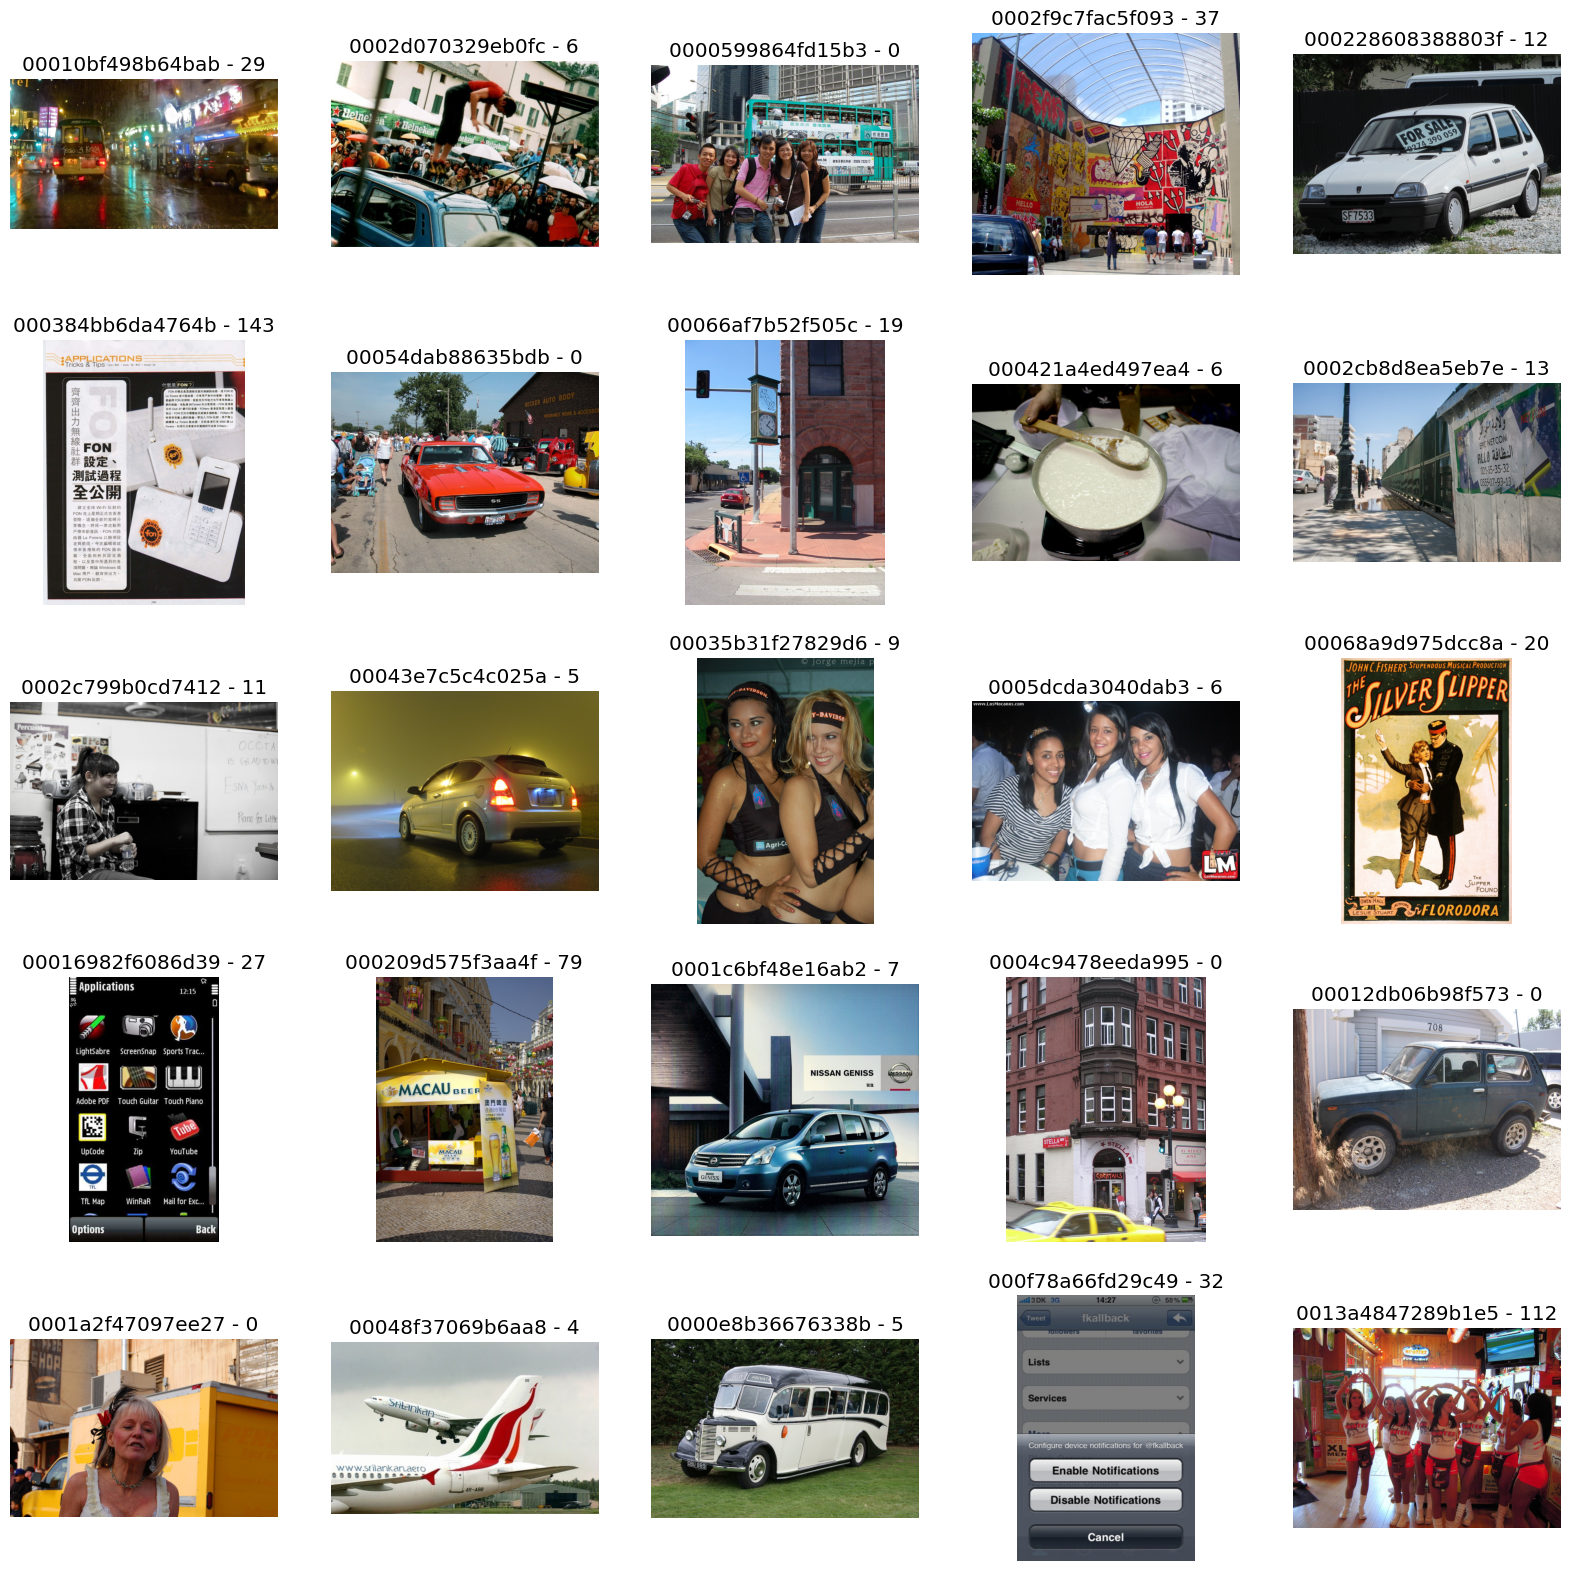

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

In [23]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.6 MB/s eta 0:00:00


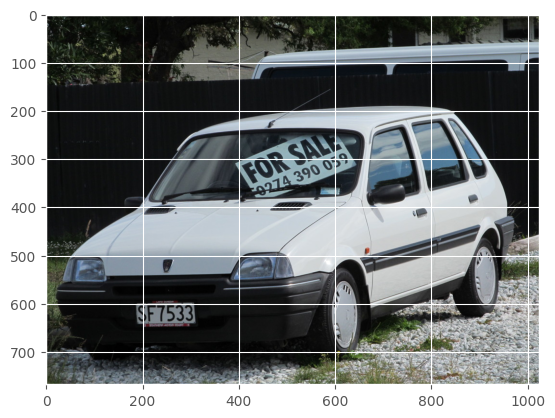

In [38]:
plt.imshow(plt.imread(img_fns[4]))

In [24]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [39]:
results = reader.readtext(img_fns[4])

In [40]:
pd.DataFrame(results, columns=['bbox','text','conf'])

bbox    text      conf
0   [[181, 595], [313, 595], [313, 645], [181, 645]]  SF7533  0.996306
1  [[488.5623984301982, 264.3435976452972], [613....    SAL]  0.599693
2  [[398.9904649372536, 300.6799763682325], [499....     FOR  0.999022
3  [[564.0268234150113, 300.3241410735102], [627....     059  0.999991
4  [[504.4392624013421, 320.9271148816105], [569....     390  0.999995
5  [[417.28609323645895, 357.51443729458356], [50...   70274  0.400946